In [1]:
# Importations
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
# Stats importations
# Stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, adfuller

In [3]:
# Utilities
# Nice style for plots
def plt_style(size=(15,9), 
              fontsize=15,
              xlim=None,
              ylim=None,):
    
    # Figure
    plt.figure(figsize = size)

    # Font sizes
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['axes.labelsize'] = fontsize
    plt.rcParams['axes.titlesize'] = fontsize
    plt.rcParams['xtick.labelsize'] = fontsize
    plt.rcParams['ytick.labelsize'] = fontsize
    plt.rcParams['legend.fontsize'] = fontsize
    plt.rcParams['figure.titlesize'] = fontsize

    # Clean Axes
    ax = plt.subplot(111)                    
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left() 
    
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
    
    # Return axis
    return ax

# Multiplot ACF and PACF
def MultiPlot(xt, 
              nlag=30, 
              fig_size=(10, 8),
              fontSize=20,
              labelSize=20,
              title="(b) Demand time series",
              save=False,
              OutFolder="", 
              namePlot="Decomposition"):
    
    if not isinstance(xt, pd.Series):
        xt = pd.Series(xt)
    
    # Font sizes
    plt.rcParams['font.size'] = fontSize
    plt.rcParams['axes.labelsize'] = fontSize
    plt.rcParams['axes.titlesize'] = fontSize
    plt.rcParams['xtick.labelsize'] = labelSize
    plt.rcParams['ytick.labelsize'] = labelSize
    plt.rcParams['legend.fontsize'] = fontSize
    plt.rcParams['figure.titlesize'] = fontSize

    # Size and layour (2x2 with first one spanning two columns)
    fig_plt = plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title(title)
    ax_xt.set_xlabel("Year")
    ax_acf.set_xlabel("N° lags")
    ax_pacf.set_xlabel("N° lags")
    
    # ACF and PACF plots
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    
    # Make it tight
    plt.tight_layout()
    
    # Save
    if save:
        plt.savefig(os.path.join(OutFolder, namePlot), 
                        dpi=200, 
                        bbox_inches='tight', 
                        pad_inches=0, 
                        transparent=False)

In [37]:
# Read Dataset
FILE = "Ten-Year-Demand.csv"
DFDemand = pd.read_csv(FILE, names=['Year', 'Month', 'Demand'], skiprows=1)

# Fill NaN with previous year 
DFDemand = DFDemand.fillna(method='ffill')

# Years to int and months from 1 to 12
DFDemand.Year = DFDemand.Year.astype(np.int)
DFDemand.Month = DFDemand.Month.apply(lambda x: x % 12 if x % 12 != 0 else 12)
DFDemand.head(24)

,Year,Month,Demand
0,1996,1,79.35
1,1996,2,75.78
2,1996,3,86.32
3,1996,4,72.60
4,1996,5,74.86
5,1996,6,83.81
6,1996,7,79.80
7,1996,8,62.41
8,1996,9,85.41
9,1996,10,83.11


In [38]:
DFDemand.shape

(120, 3)

In [5]:
# Years
np.unique(DFDemand['Year'])

# Plots per year by month
# for m in np.unique(DFDemand['Month']):
#     ax = plt_style(size=(10,8))
#     (DFDemand[DFDemand['Month'] == m].Demand, ax=ax)

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005])

In [6]:
# Exploration
DFDemand.dtypes

Year        int32
Month       int64
Demand    float64
dtype: object

In [7]:
# Description
display(DFDemand.describe())
print("-" * 10, "Summary", "-" * 10)
print("Max:", DFDemand.Demand.max(),
      "\nMin:", DFDemand.Demand.min(),
      "\nSTD:", DFDemand.Demand.std(),
      "\nMean:", DFDemand.Demand.mean())

,Year,Month,Demand
count,120.000000,120.000000,120.000000
mean,2000.500000,6.500000,93.786083
std,2.884324,3.466527,12.228239
min,1996.000000,1.000000,62.410000
25%,1998.000000,3.750000,85.397500
50%,2000.500000,6.500000,92.365000
75%,2003.000000,9.250000,101.170000
max,2005.000000,12.000000,128.610000


---------- Summary ----------
Max: 128.61 
Min: 62.41 
STD: 12.228239069845655 
Mean: 93.78608333333332


Text(0.5, 1.0, 'Full dataset distribution plot')

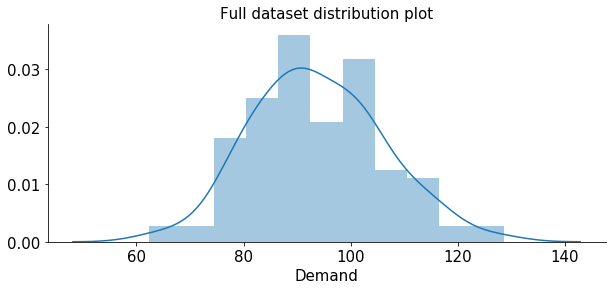

In [8]:
# Full demand plot
g = sns.distplot(DFDemand['Demand'],
                 ax=plt_style(size=(10,4)))
g.set_title("Full dataset distribution plot")

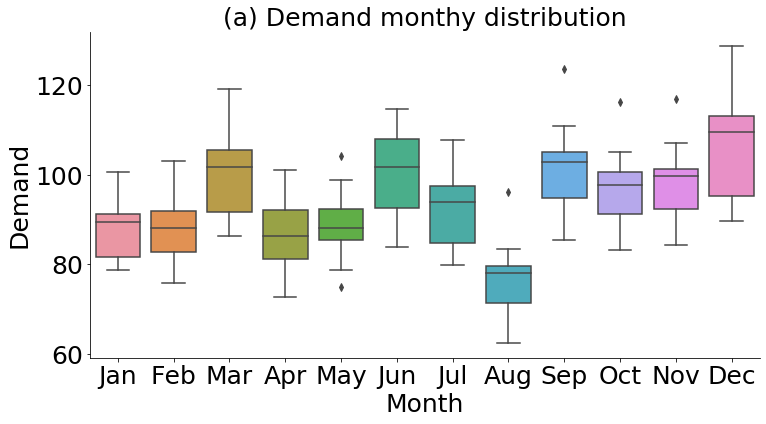

In [9]:
# Boxplot
replaceVals = {'Month' :  {1 : 'Jan', 
                           2 : 'Feb', 
                           3 : 'Mar',
                           4 : 'Apr',
                           5 : 'May', 
                           6 : 'Jun',
                           7 : 'Jul', 
                           8 : 'Aug',
                           9 : 'Sep',
                           10: 'Oct',
                           11: 'Nov',
                           12: 'Dec'}}
ax = plt_style(size=(12,6), fontsize=25)
g = sns.boxplot(data=DFDemand.replace(replaceVals), 
                x='Month', 
                y='Demand', 
                ax=ax)
g.set_title("(a) Demand monthy distribution")

OutFolder = r'E:/Papers/FPV/AmazonCompetition'
namePlot = 'BP_PerMonth.pdf'
plt.savefig(os.path.join(OutFolder, namePlot), 
                    dpi=200, 
                    bbox_inches='tight', 
                    pad_inches=0, 
                    transparent=False)

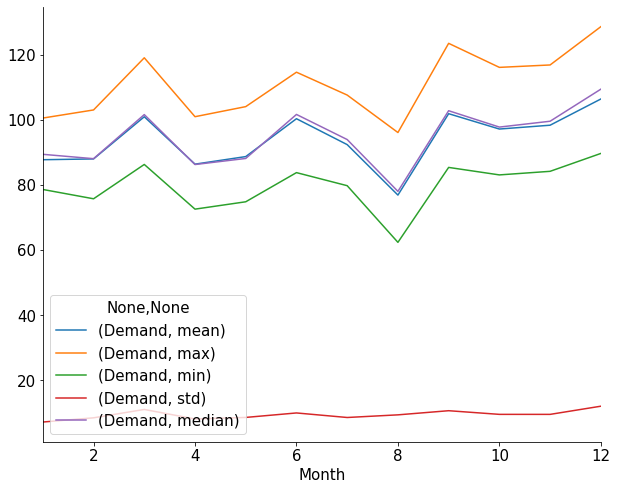

In [10]:
# Statistics per Month (detailed table)
aggDict = {'Demand':['mean', 'max', 'min', 'std', 'median']}
MonthlyStats = DFDemand.groupby('Month').agg(aggDict)
MonthlyStats.plot(ax=plt_style(size=(10,8)))

In [11]:
MonthlyStats.Demand

,mean,max,min,std,median
Month,,,,,
1,87.770,100.56,78.64,7.246260,89.430
2,88.016,103.05,75.78,8.541322,88.090
3,100.957,119.06,86.32,11.106720,101.625
4,86.412,100.98,72.60,8.186266,86.295
5,88.735,104.07,74.86,8.660320,88.160
6,100.357,114.64,83.81,10.034132,101.670
7,92.407,107.62,79.80,8.640178,93.965
8,76.915,96.12,62.41,9.451580,78.055
9,101.901,123.50,85.41,10.722906,102.815


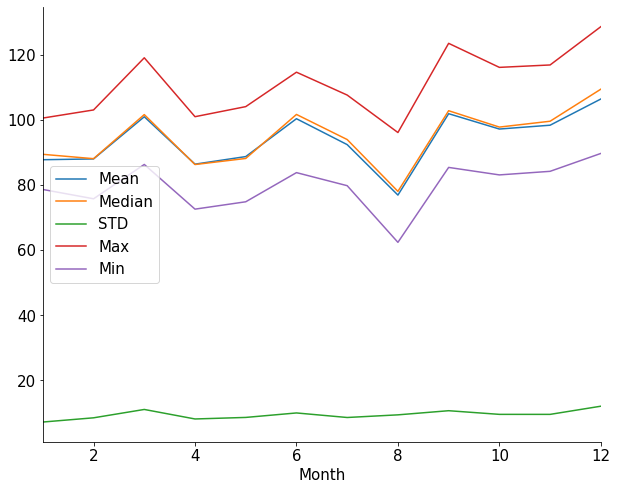

In [12]:
# Statistics per Month (clean plot)
DTMonth = pd.DataFrame(index=DFDemand["Month"].unique())
DTMonth.index.rename("Month", inplace=True)
DTMonth["Mean"] = DFDemand.groupby('Month').mean()["Demand"]
DTMonth["Median"] = DFDemand.groupby('Month').median()["Demand"]
DTMonth["STD"] = DFDemand.groupby('Month').std()["Demand"]
DTMonth["Max"] = DFDemand.groupby('Month').max()["Demand"]
DTMonth["Min"] = DFDemand.groupby('Month').min()["Demand"]
DTMonth.plot(ax=plt_style(size=(10,8)))

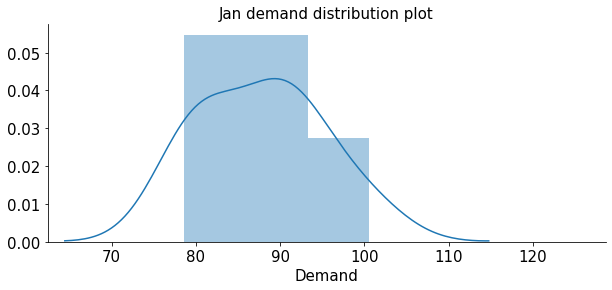

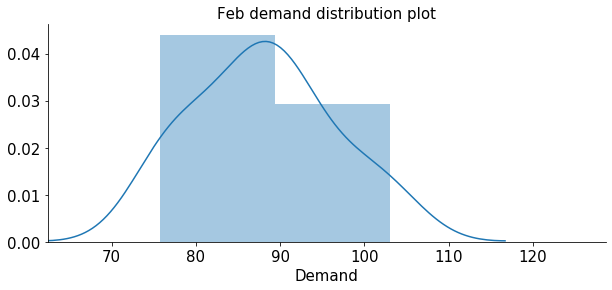

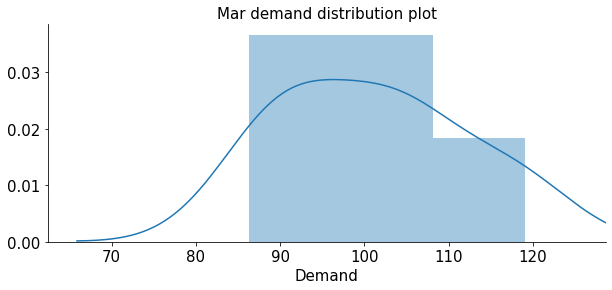

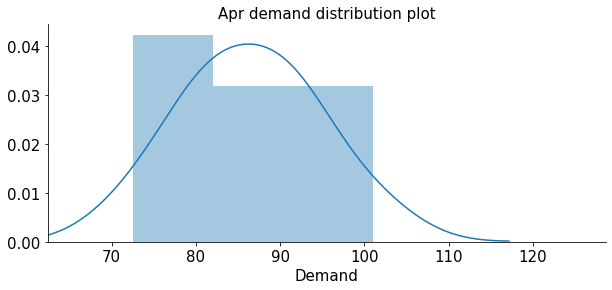

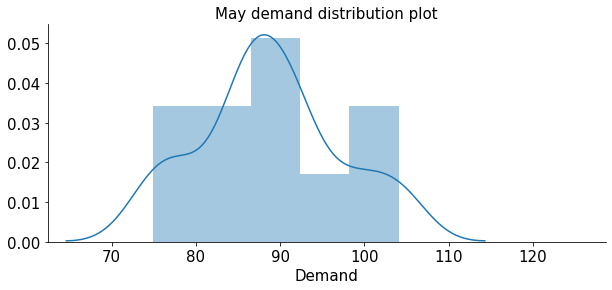

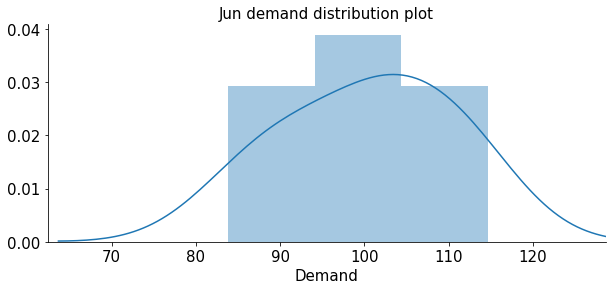

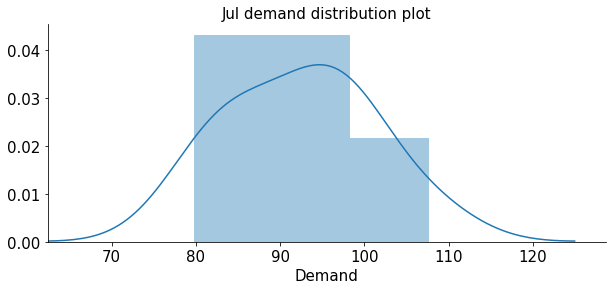

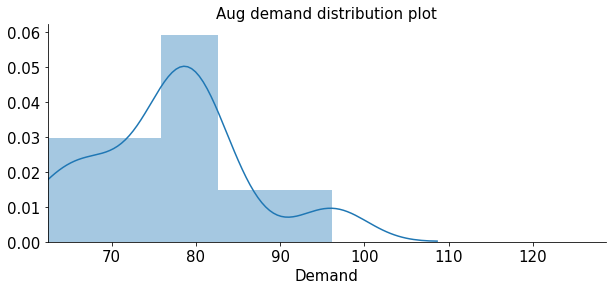

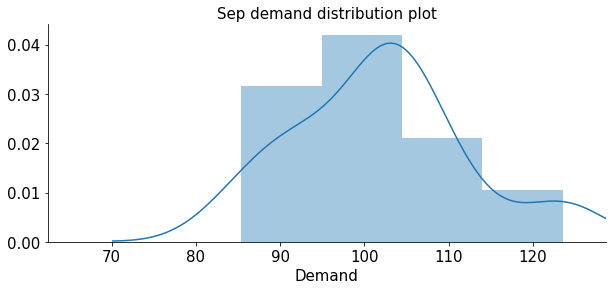

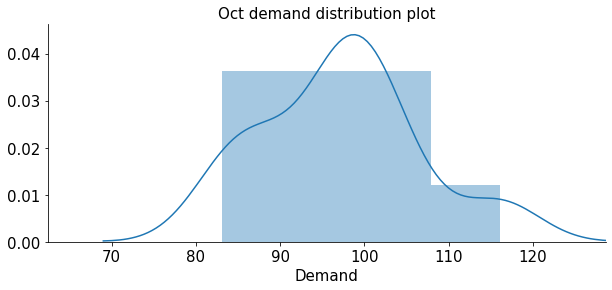

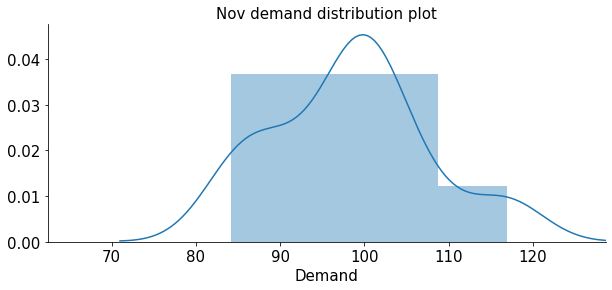

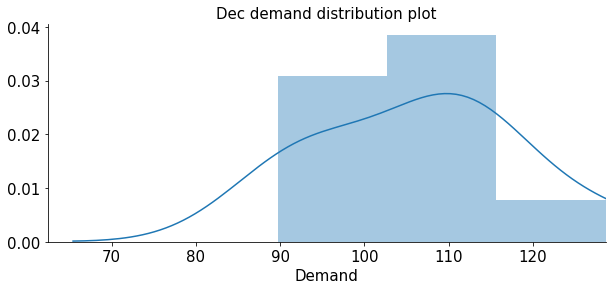

In [13]:
# Full demand dist plot per month
MonthsDict = { 1 : 'Jan', 
               2 : 'Feb', 
               3 : 'Mar',
               4 : 'Apr',
               5 : 'May', 
               6 : 'Jun',
               7 : 'Jul', 
               8 : 'Aug',
               9 : 'Sep',
               10: 'Oct',
               11: 'Nov',
               12: 'Dec'}
for m in np.unique(DFDemand.Month):
    g = sns.distplot(DFDemand[DFDemand['Month'] == m]['Demand'],
                     ax=plt_style(size=(10,4),
                                  xlim=[DFDemand['Demand'].min(), DFDemand['Demand'].max()]))
    g.set_title(MonthsDict[m] + " demand distribution plot")

In [14]:
# Time series formatting
DFTS = DFDemand.copy(deep=True)
DFTS["period"] = DFTS["Year"].map(str) + "-" + DFTS["Month"].map(str)
DFTS["period"] = pd.to_datetime(DFTS["period"])
DFTS.set_index('period', inplace=True)
DFTS

,Year,Month,Demand
period,,,
1996-01-01,1996,1,79.35
1996-02-01,1996,2,75.78
1996-03-01,1996,3,86.32
1996-04-01,1996,4,72.60
1996-05-01,1996,5,74.86
1996-06-01,1996,6,83.81
1996-07-01,1996,7,79.80
1996-08-01,1996,8,62.41
1996-09-01,1996,9,85.41


Null hypothesis is rejected for lags: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64),)
p-value adfuller: 0.10303466867288152


c:\Python36\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


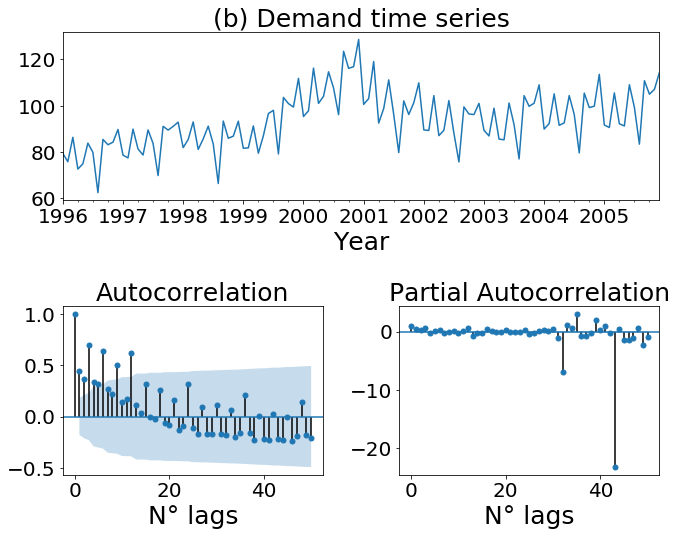

In [30]:
# PACF and AC
_, _, _, pval_quarterH_mean = acf(DFTS['Demand'], unbiased=True, nlags=20, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_quarterH_mean<=0.05))
results = adfuller(DFTS["Demand"], autolag='AIC')
print("p-value adfuller:", results[1])
MultiPlot(xt=DFTS["Demand"], 
          save=True,
          fontSize=25,
          labelSize=20,
          namePlot="PAC_AC.pdf",
          OutFolder=r'E:\Papers\FPV\AmazonCompetition')

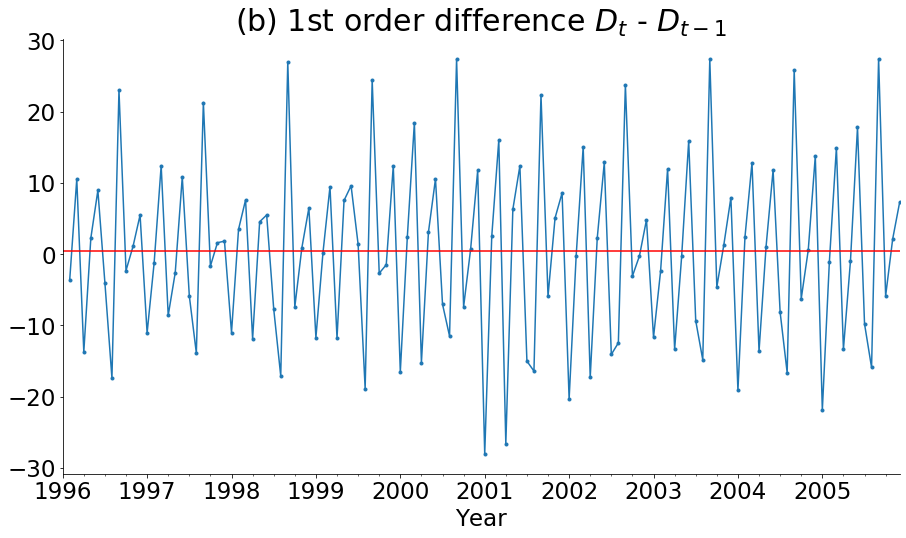

In [36]:
# 1st difference (seems like random error between -30 to 30)
DFTS_1D = DFTS['Demand'].diff(1)
ax = plt_style(size=(15,8), fontsize=23)
DFTS_1D.plot(title="(b) 1st order difference $D_t$ - $D_{t-1}$", marker=".", ax=ax)
plt.title("(b) 1st order difference $D_t$ - $D_{t-1}$", size=30)
plt.xlabel("Year")
plt.axhline(y=0.5, color='r', linestyle='-')
OutFolder = r"E:\Papers\FPV\AmazonCompetition"
namePlot = "1stOrderDiff.pdf"
plt.savefig(os.path.join(OutFolder, namePlot), 
                        dpi=200, 
                        bbox_inches='tight', 
                        pad_inches=0, 
                        transparent=False)

c:\Python36\lib\site-packages\statsmodels\tsa\seasonal.py:201: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


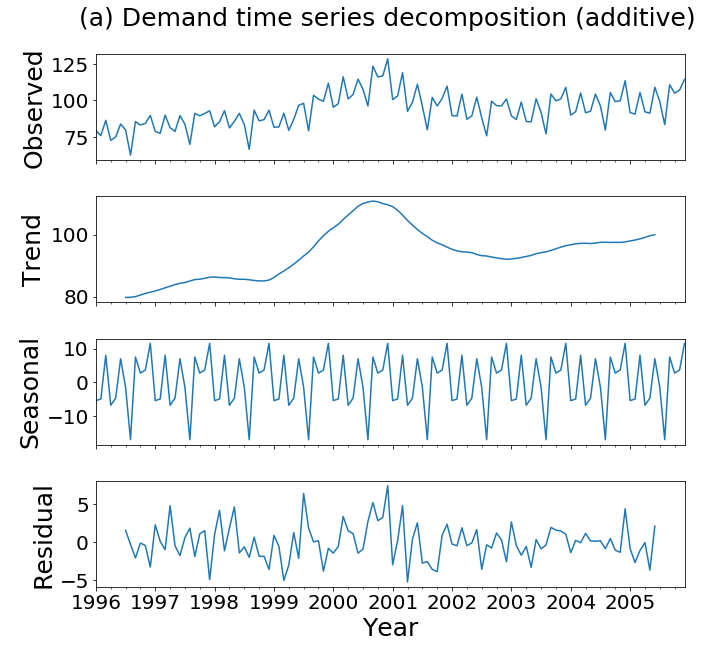

In [31]:
# Decomposition (additive using 12 months freq)
decomposition = sm.tsa.seasonal_decompose(DFTS['Demand'], model='additive', freq=12)
fig = decomposition.plot()
fig.set_size_inches(10,9)
fig.tight_layout()
fig.suptitle("         (a) Demand time series decomposition (additive)", y=1.02)
plt.xlabel('Year', fontsize=25)
OutFolder= r'E:\Papers\FPV\AmazonCompetition'
namePlot = "Decomposition.pdf"
plt.savefig(os.path.join(OutFolder, namePlot), 
                         dpi=200, 
                         bbox_inches='tight', 
                         pad_inches=0, 
                         transparent=False)

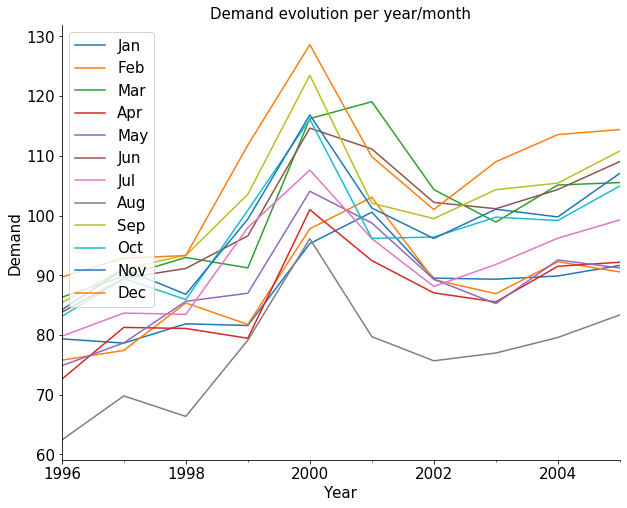

In [121]:
# All months demand
ax = plt_style(size=(10,8))
for m in np.unique(DFTS.Month):
    DFTS[DFTS['Month'] == m].Demand.plot(ax=ax, label=MonthsDict[m])
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Demand')
    plt.title('Demand evolution per year/month')

In [123]:
DFTS[:-36]

(84, 3)

In [130]:
# Arima
import pmdarima as pm
from pmdarima.arima import ARIMA

# fitting a stepwise model:
stepwise_fit = pm.auto_arima(DFTS.Demand[0:60], 
                             start_p=1, 
                             start_q=1, 
                             max_p=12, 
                             max_q=12, 
                             m=12,
                             start_P=0, 
                             seasonal=True, 
                             d=1, 
                             D=1, 
                             trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True, # don't want convergence warnings
                             stepwise=True)          # set to stepwise
stepwise_fit.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=272.001, BIC=275.701, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=260.917, BIC=268.317, Fit time=0.201 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=268.916, BIC=274.466, Fit time=0.063 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=257.454, BIC=266.705, Fit time=0.423 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=263.386, BIC=270.787, Fit time=0.350 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=250.693, BIC=261.794, Fit time=0.691 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 0, 12); AIC=251.982, BIC=26

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -119.347
Date:                            Sat, 12 Oct 2019   AIC                            250.693
Time:                                    16:21:03   BIC                            261.794
Sample:                                         0   HQIC                           254.870
                                             - 60                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2136      0.596      3.713      0.000       1.045       3.382
ar.L1         -0.6382      0.158     -4.049      0.000      -0.947      -0.329
ar.L2         -0.4501      0.143     -3.154      0.002      -0.730      -0.170
ar.S.L12      -0.7908      0.152     -5.211      0.000      -1.088      -0.493
ar.S.L24      -0.5911      0.205     -2.879      0.004      -0.994      -0.189
sigma2         6.9244      2.306      3.002      0.003       2.404      11.445
===================================================================================
Ljung-Box (Q):                       28.51   Jarque-Bera (JB):                 3.19
Prob(Q):                              0.91   Prob(JB):                         0.20
Heteroskedasticity (H):               1.93   Skew:                             0.64
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [131]:
from bokeh.plotting import figure, show, output_notebook

# init bokeh
output_notebook()

# Plot arima and data
def plot_arima(truth, 
               forecasts, 
               title="ARIMA", 
               xaxis_label='Time',
               yaxis_label='Value', 
               c1='#A6CEE3', 
               c2='#B2DF8A', 
               forecast_start=None, 
               **kwargs):
    
    # make truth and forecasts into pandas series
    n_truth = truth.shape[0]
    n_forecasts = forecasts.shape[0]
    
    # always plot truth the same
    truth = pd.Series(truth, index=np.arange(truth.shape[0]))
    
    # if no defined forecast start, start at the end
    if forecast_start is None:
        idx = np.arange(n_truth, n_truth + n_forecasts)
    else:
        idx = np.arange(forecast_start, n_forecasts)
    forecasts = pd.Series(forecasts, index=idx)
    
    # set up the plot
    p = figure(title=title, plot_height=500, plot_width=1000, tools='hover', **kwargs)
    
    p.grid.grid_line_alpha=0.3
    p.xaxis.axis_label = xaxis_label
    p.yaxis.axis_label = yaxis_label
    
    # add the lines
    p.line(truth.index, truth.values, color='blue', alpha=0.6, legend='Observed')
    p.line(forecasts.index, forecasts.values, color=c2, alpha=0.6, legend='Forecasted')
    
    return p

# Predictions
in_sample_preds = stepwise_fit.predict_in_sample()
in_sample_preds[:10]

# Show the plot
show(plot_arima(DFTS.Demand.values[0:60], 
                in_sample_preds, 
                title="Original Series & In-sample Predictions", 
                c2='#FF0000', 
                forecast_start=0))

Loading BokehJS ...

In [132]:
# Prediction without new data
next_60 = stepwise_fit.predict(n_periods=60)
next_60

array([114.23919322, 117.34390111, 130.43783176, 118.04770694,
       123.70933743, 132.69861702, 127.78612299, 112.47948942,
       140.25577932, 134.79307673, 136.19675271, 146.07816735,
       133.8976478 , 136.19480957, 149.29345872, 137.74246136,
       145.05680771, 155.79325722, 155.24436219, 139.65598373,
       166.43637159, 163.3013519 , 163.92146   , 176.72521068,
       162.613821  , 166.23423301, 183.5612918 , 170.71607623,
       176.26314867, 187.61229954, 183.42669236, 171.3712995 ,
       199.76498849, 194.71575705, 196.62317097, 209.28040265,
       196.46121352, 200.57249003, 215.61277626, 204.35499322,
       211.38266485, 222.27442818, 219.44533436, 205.82246709,
       234.58898493, 230.73756075, 233.15009217, 245.25567018,
       233.61593557, 237.61676914, 253.02591267, 242.33776048,
       250.2991885 , 262.25044243, 261.55832167, 248.146558  ,
       276.72452033, 274.11735226, 276.429417  , 290.11783393])

In [133]:
# Plot
show(plot_arima(DFTS.Demand.values[60:], 
                next_60, 
                c2='red',
                forecast_start=0))

In [ ]:
# fitting a stepwise model:
stepwise_fit = pm.auto_arima(DFTS.Demand[0:60], 
                             start_p=1, 
                             start_q=1, 
                             max_p=12, 
                             max_q=12, 
                             m=12,
                             start_P=0, 
                             seasonal=True, 
                             d=1, 
                             D=1, 
                             trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True, # don't want convergence warnings
                             stepwise=True)          # set to stepwise
stepwise_fit.summary()

In [136]:
Ft = []
Dt = []

for i in range(0,60):
    if i % 10 == 0:
        print("Iter", i)
    Ft.append(stepwise_fit.predict(n_periods=1))
    Dt.append(DFTS.Demand[60 + i])
    
    if i % 10 == 0:
        print("updating...")
    stepwise_fit.update([Dt[-1]], maxiter=50) 

Iter 0
updating...
Iter 10
updating...
Iter 20
updating...
Iter 30
updating...
Iter 40
updating...
Iter 50
updating...


MAPE [%]: 3.02


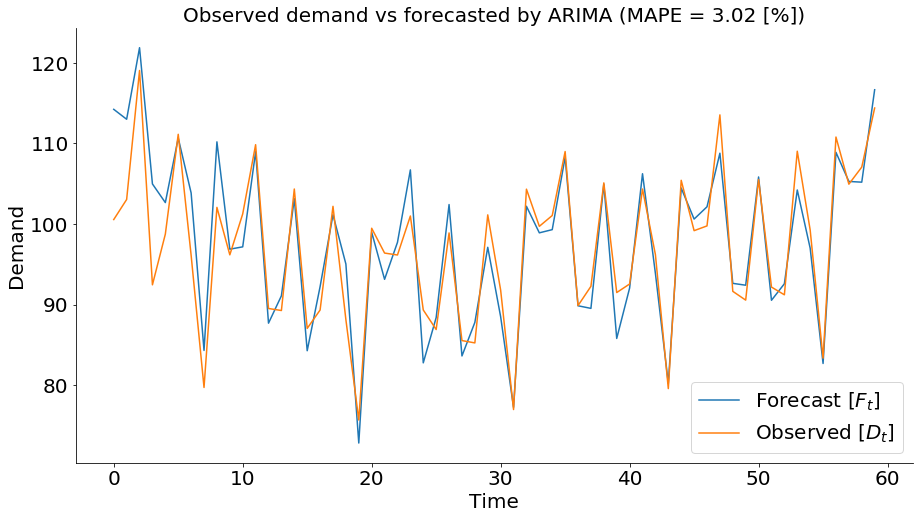

In [168]:
# MAPE and observations
MAPE = np.round((100 / len(Dt)) * np.sum( np.abs(np.asarray(Dt) - np.asarray(Ft).flatten()) / np.asarray(Dt) ), 2) 
print("MAPE [%]:", MAPE)

ax = plt_style(size=(15, 8), fontsize=20)
plt.plot(np.asarray(Ft).flatten(), label="Forecast [$F_t$]")
plt.plot(Dt, label="Observed [$D_t$]")
plt.title("Observed demand vs forecasted by ARIMA (MAPE = " + str(MAPE) +" [%])")
plt.xlabel("Time")
plt.ylabel("Demand")
plt.legend()

MAPE [%]: 3.019794126000488


In [158]:
np.asarray(Dt) - np.asarray(Ft).flatten()

array([-13.67919322,  -9.95584877,  -2.82918618, -12.51897673,
        -3.91692175,   0.45973005,  -7.73382679,  -4.595404  ,
        -8.1333826 ,  -0.70188975,   4.08868251,   0.86741532,
         1.82030813,  -1.8255019 ,   1.19775876,   2.77082625,
        -2.90486763,   1.04456901,  -6.90904183,   2.85618379,
         0.49465426,   3.25846461,  -1.57193329,  -5.72372582,
         6.56494476,  -1.48331374,  -3.52097907,   1.90796797,
        -2.54378503,   4.02435168,   3.30232092,  -0.27635469,
         2.12216336,   0.80980361,   1.75214175,   0.69735904,
         0.02040471,   2.73517769,   0.15400017,   5.69624609,
         0.49961325,  -1.89718229,   2.33248954,  -0.63762742,
         0.95989182,  -1.43939212,  -2.37270498,   4.75697827,
        -0.99165816,  -1.85024712,  -0.32460355,   1.63834207,
        -1.36971267,   4.81113918,   2.25526495,   0.66274384,
         1.89952643,  -0.33886277,   1.87135225,  -2.26940463])

In [23]:
# Update model with next 6 values (assuming we already saw them)
stepwise_fit.update(next_60, maxiter=10)  # take 10 more steps
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -216.408
Date:                            Sat, 12 Oct 2019   AIC                            444.815
Time:                                    14:10:14   BIC                            460.852
Sample:                                         0   HQIC                           451.317
                                            - 120                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5780      0.228     11.294      0.000       2.131       3.025
ar.L1         -0.7074      0.067    -10.562      0.000      -0.839      -0.576
ar.L2         -0.5145      0.064     -8.078      0.000      -0.639      -0.390
ar.S.L12      -0.8924      0.068    -13.186      0.000      -1.025      -0.760
ar.S.L24      -0.7174      0.063    -11.423      0.000      -0.841      -0.594
sigma2         2.7242      0.278      9.814      0.000       2.180       3.268
===================================================================================
Ljung-Box (Q):                       46.56   Jarque-Bera (JB):                64.59
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
# Updated data
updated_data = np.concatenate([DFTS.Demand.values, next_60])

In [25]:
# Visualize new forecasts
show(plot_arima(updated_data, 
                stepwise_fit.predict(n_periods=10),
                c2='red'))

# Inventory model

In [26]:
import scipy.stats as st
print(st.norm.ppf(.96))

# Parameters
L = 1    # Lead time in months
K = 1    # Setup cost (dummy)
h = 1    # Holding cost (per month/unit)
c = 1    # Purchase cost (unit)
p = 3    # stock-out cost 

# Demand
dmu = DFDemand.Demand.mean()
dsigma = DFDemand.Demand.std()

1.7506860712521692


In [27]:
def LossNormal(z):
    return st.norm.pdf(z) - z * (1 - st.norm.cdf(z))

In [28]:
# Iterative approach
Q = []
R = []
z = []
maxIter = 1000
niter = 0
eps = 1e-6

while niter < maxIter:
    if niter == 0:
        Q.append(np.sqrt((2 * K * dmu) / h))
        z.append(st.norm.ppf(1 - (Q[-1] * h) / (p * dmu)))
        R.append(dsigma * z[-1] + dmu)
        
    else:
        RLoss = dsigma * LossNormal(z[-1])
        Q.append(np.sqrt(( 2 * dmu * (K + p * RLoss)) / h ))
        z.append(st.norm.ppf(1 - (Q[-1] * h) / (p * dmu)))
        R.append(dsigma * z[-1] + dmu)
        
        if np.abs(Q[-1] - Q[-2]) < eps and np.abs(R[-1] - R[-2]) < eps:
            break
        
    if niter % 10 == 0:
        print("Iteration", niter, "- Q =", Q[-1], " R =", R[-1], "z =", z[-1])
        
    niter += 1

print("")
print("Safety stock:", R[-1] - dmu)
print("Cycle:", Q[-1] / dmu)
print("Expected demand:", dmu)
print("STD demand:", dsigma)

Iteration 0 - Q = 13.695698838199775  R = 114.05828067851053 z = 1.657818205007753
Iteration 10 - Q = 20.16519457590146  R = 111.68161236142252 z = 1.4634592050313155

Safety stock: 17.895507006094533
Cycle: 0.21501339151069632
Expected demand: 93.78608333333332
STD demand: 12.228239069845655


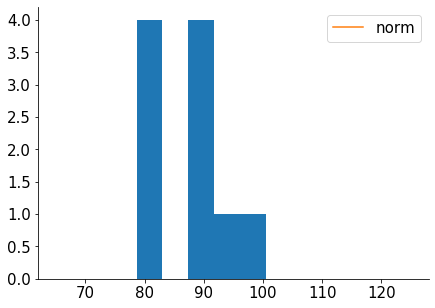

(87.77000000000001, 6.874406156170874)


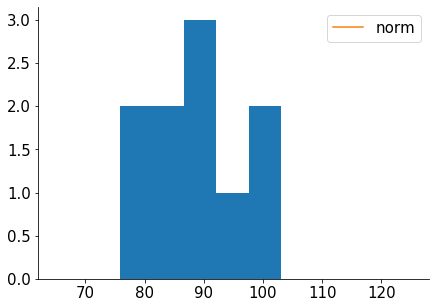

(88.01599999999999, 8.103009564353234)


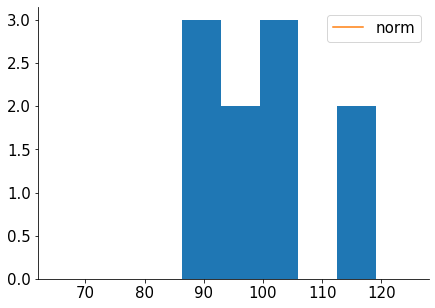

(100.95700000000001, 10.53675951134883)


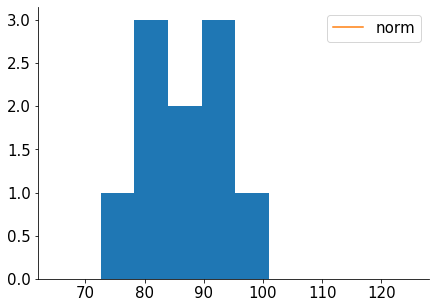

(86.412, 7.766173832718401)


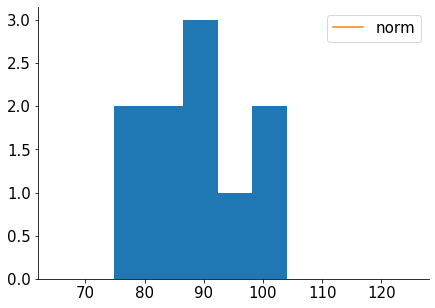

(88.73499999999999, 8.215900741854174)


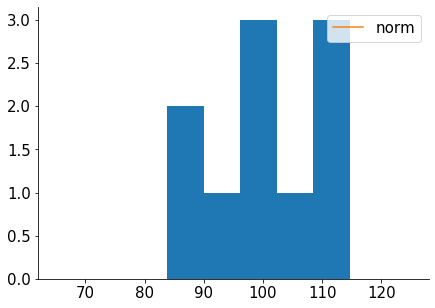

(100.357, 9.519213255306344)


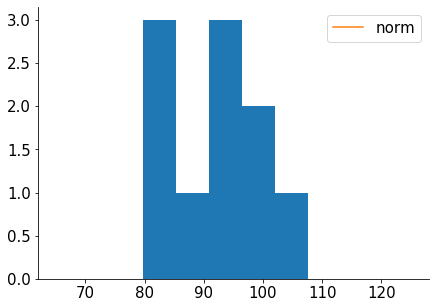

(92.407, 8.196792116431892)


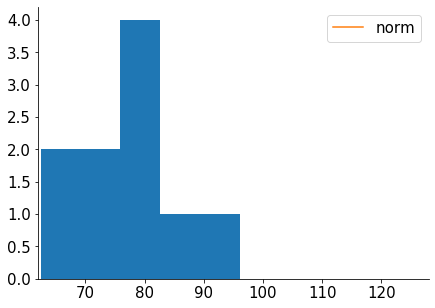

(76.915, 8.9665559162925)


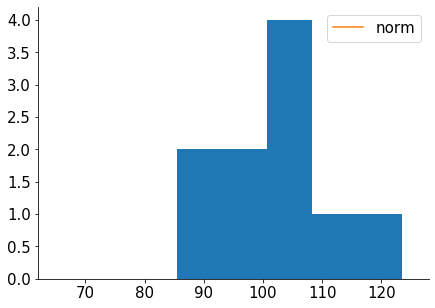

(101.901, 10.172642183818322)


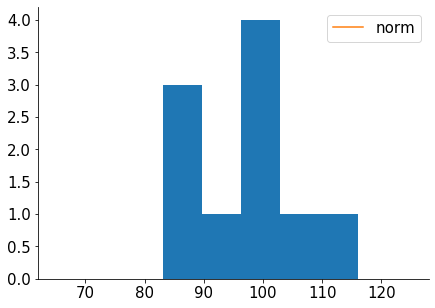

(97.191, 9.10774005997097)


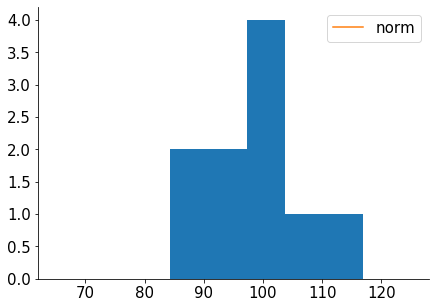

(98.364, 9.104565008829361)


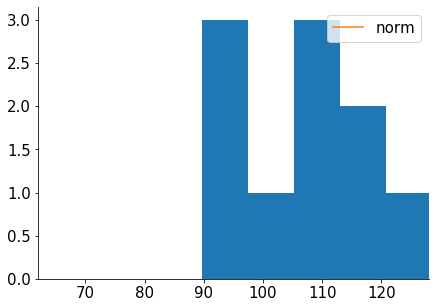

(106.40799999999999, 11.484552059179324)


In [29]:
import scipy

for m in np.unique(DFDemand['Month']):
    plt_style(size=(7,5))
    xlim = [int(DFDemand.Demand.min()), 
            int(DFDemand.Demand.max())]

    size = DFDemand[DFDemand['Month'] == m].shape[0]
    x = scipy.arange(size)
    y = scipy.int_(scipy.round_(st.vonmises.rvs(5,size=size)*600))
    h = plt.hist(DFDemand[DFDemand['Month'] == m].Demand.values, bins=5,)

    dist_names = ['norm']

    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(DFDemand[DFDemand['Month'] == m].Demand.values)
        pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
        plt.plot(pdf_fitted, label=dist_name)
        plt.xlim(xlim)
    plt.legend(loc='upper right')
    plt.show()

    print(param)

# Cumulative Holding and Shortage costs plot

In [44]:
DFHW = pd.read_pickle("dfFinal.p")
DFHW["period"] = DFHW["Year"].map(str) + "-" + DFHW["Month"].map(str)
DFHW["period"] = pd.to_datetime(DFHW["period"])
DFHW.set_index('period', inplace=True)
DFHW.tail(36)

,Month,Year,Demand,PredRaw,PredPlusBias,ErrorRaw,ErrorBiased,HolC_RAW,HolC_Biased,ShorC_RAW,ShorC_Biased
period,,,,,,,,,,,
2003-01-01,1,2003,89.34,86.402239,88.160860,2.937761,1.179140,0.000000,0.000000,0.000000,0.000000
2003-02-01,2,2003,86.91,88.784016,88.885570,-1.874016,-1.975570,1.874016,1.975570,0.000000,0.000000
2003-03-01,3,2003,98.90,99.971251,100.713832,-1.071251,-1.813832,1.071251,1.813832,0.000000,0.000000
2003-04-01,4,2003,85.54,84.376789,87.115989,1.163211,-1.575989,0.000000,1.575989,3.489634,0.000000
2003-05-01,5,2003,85.25,88.017336,88.320566,-2.767336,-3.070566,2.767336,3.070566,0.000000,0.000000
2003-06-01,6,2003,101.14,95.967644,96.804052,5.172356,4.335948,0.000000,0.000000,15.517067,13.007843
2003-07-01,7,2003,91.80,91.009241,91.708682,0.790759,0.091318,0.000000,0.000000,2.372278,0.273955
2003-08-01,8,2003,76.98,75.739929,76.675116,1.240071,0.304884,0.000000,0.000000,3.720214,0.914652
2003-09-01,9,2003,104.33,101.496336,103.856855,2.833664,0.473145,0.000000,0.000000,8.500991,1.419435


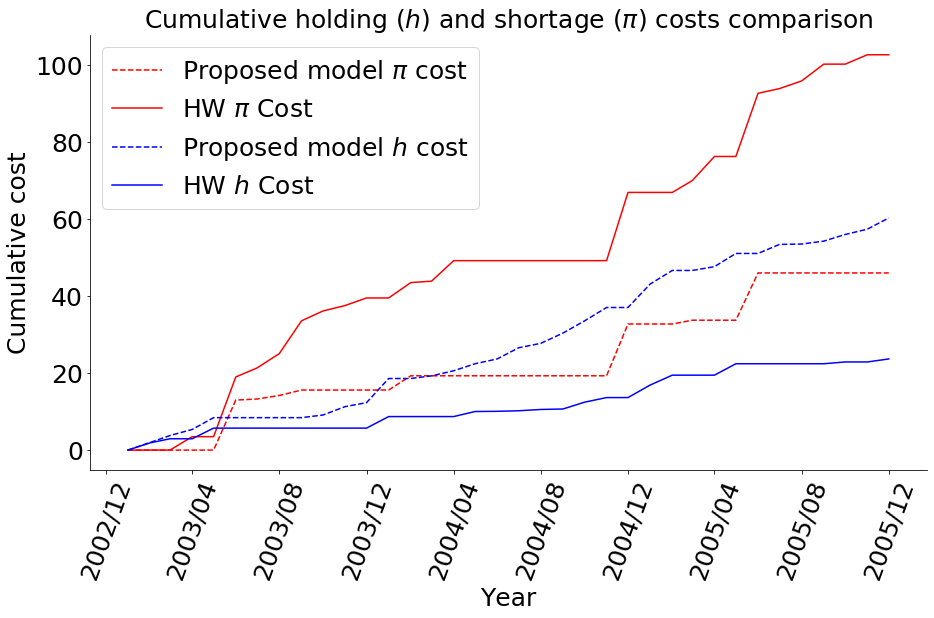

In [118]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

ax = plt_style(size=(15,8), fontsize=25)
plt.plot(np.cumsum(DFHW.iloc[-36:, -1]), label="Proposed model $\pi$ cost", color="red", ls="--")
plt.plot(np.cumsum(DFHW.iloc[-36:, -2]), label="HW $\pi$ Cost", color="red")
plt.plot(np.cumsum(DFHW.iloc[-36:, -3]), label="Proposed model $h$ cost", color="blue", ls="--")
plt.plot(np.cumsum(DFHW.iloc[-36:, -4]), label="HW $h$ Cost", color="blue")

# plt.xticks(DFHW.iloc[-36:,],
#            labels=["2003-01", "2003-06", "2003-12",
#                    "2004-01", "2004-06", "2004-12",
#                    "2005-01", "2005-06", "2005-12"],
#            rotation=70)

# Define the date format
date_form = DateFormatter("%Y/%m")
ax.xaxis.set_major_formatter(date_form)
# Ensure ticks fall once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))

#Labels = [str(DFHW.iloc[-36:,:].index[i])[:7] for i in range(0,36)]
#ax.xaxis.set_ticklabels(Labels)
plt.xticks(rotation=70)



plt.xlabel("Year")
plt.ylabel("Cumulative cost")
plt.title("Cumulative holding ($h$) and shortage ($\pi$) costs comparison")
plt.legend()
OutFolder = r'E:\Papers\FPV\AmazonCompetition'
namePlot = "CumDiff.pdf"

plt.savefig(os.path.join(OutFolder, namePlot), 
                        dpi=200, 
                        bbox_inches='tight', 
                        pad_inches=0, 
                        transparent=False)

In [111]:
str(DFHW.iloc[-36:,:].index[0])[:7]

'2003-01'

In [97]:
DFHW.iloc[-36:, :].index.min()

Timestamp('2003-01-01 00:00:00')